# 📊 Multivariate Time Series Modeling with VAR in Econometron

This notebook demonstrates how to use the Vector Autoregression (VAR) model from Econometron to analyze and forecast multiple macroeconomic time series: interest rate, inflation, and GDP, using the `Z.mat` dataset.

---

## 1️⃣ Introduction

VAR models capture the dynamic interdependencies among multiple time series. Here, we use three key macroeconomic variables:
- **Interest Rate** (row 0 of Z)
- **Inflation** (row 1 of Z)
- **GDP** (row 2 of Z)

We will fit a VAR model, forecast future values, and visualize the results.

In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from econometron.Models.Base_Var import VAR

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 3️⃣ Load and Prepare the Data

We extract the first three rows from `Z.mat` as interest rate, inflation, and GDP.

In [2]:
# Load Z.mat
Z = scipy.io.loadmat('../Z.mat')["Z"]
interest = Z[0, :]
inflation = Z[1, :]
gdp = Z[2, :]

# Create a DataFrame
n = Z.shape[1]
dates = pd.date_range(start='2000-01-01', periods=n, freq='Q')
df = pd.DataFrame({
    'interest': interest,
    'inflation': inflation,
    'gdp': gdp,
    'date': dates
})

## 4️⃣ Visualize the Series

Let's plot the three series to understand their dynamics.

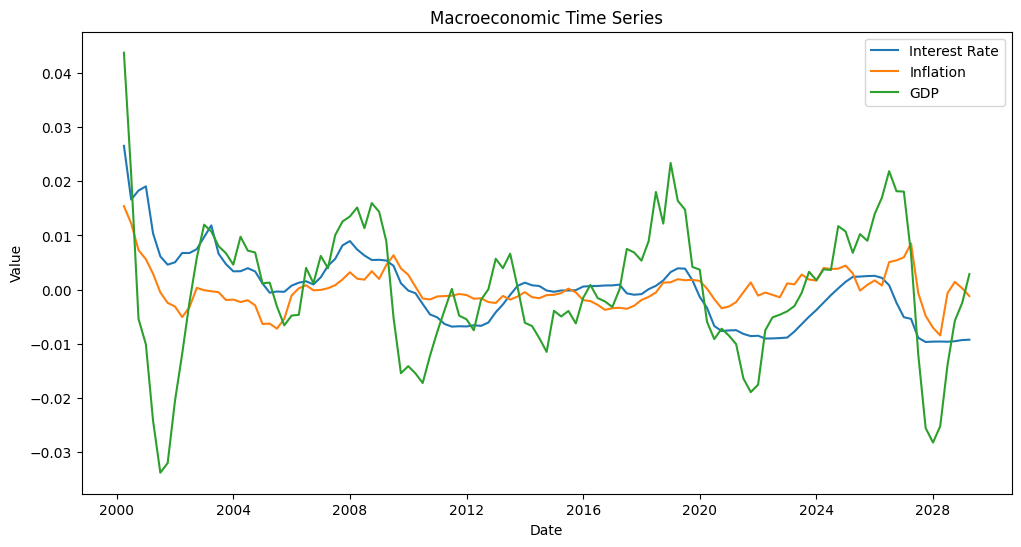

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['interest'], label='Interest Rate')
plt.plot(df['date'], df['inflation'], label='Inflation')
plt.plot(df['date'], df['gdp'], label='GDP')
plt.title('Macroeconomic Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## 5️⃣ Fit the VAR Model

We use the Econometron VAR class to fit the model and select the optimal lag order.


Processing column: interest
interest is not stationary (p-value: 0.1926)
interest becomes stationary after 1 differencing (p-value: 0.0000)

Processing column: inflation
inflation is stationary (p-value: 0.0328)

Processing column: gdp
gdp is stationary (p-value: 0.0018)


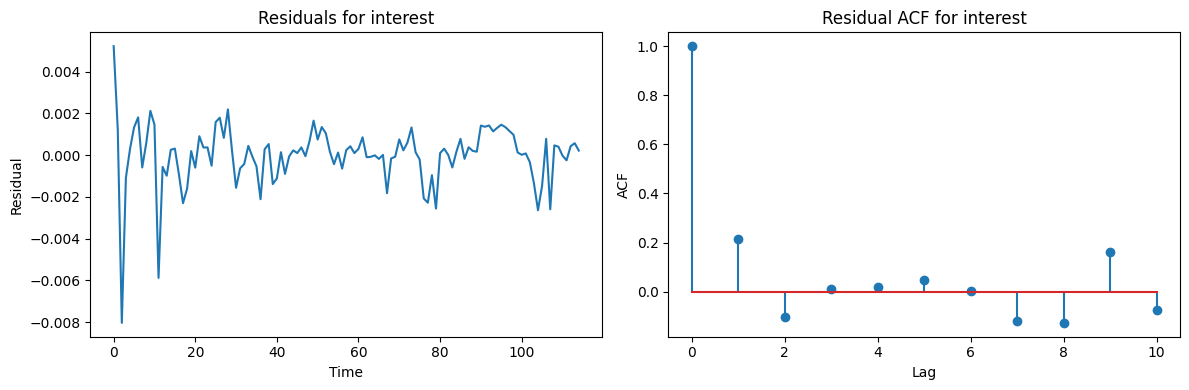

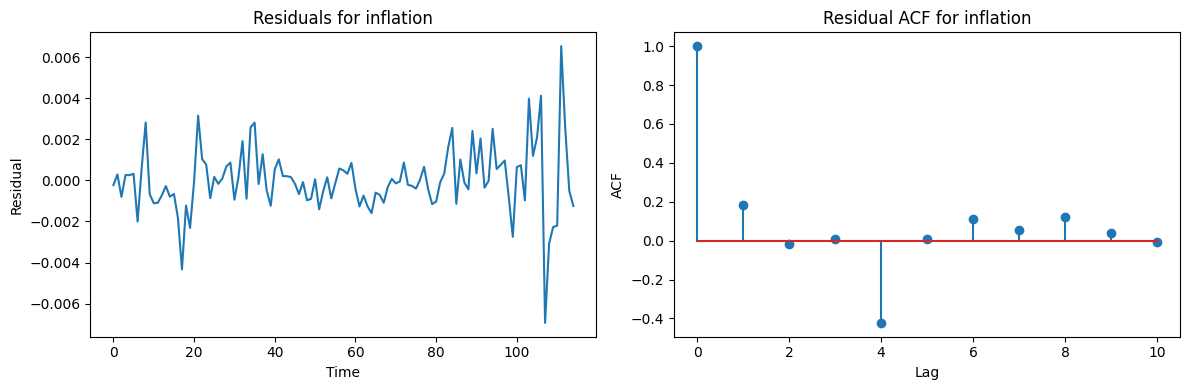

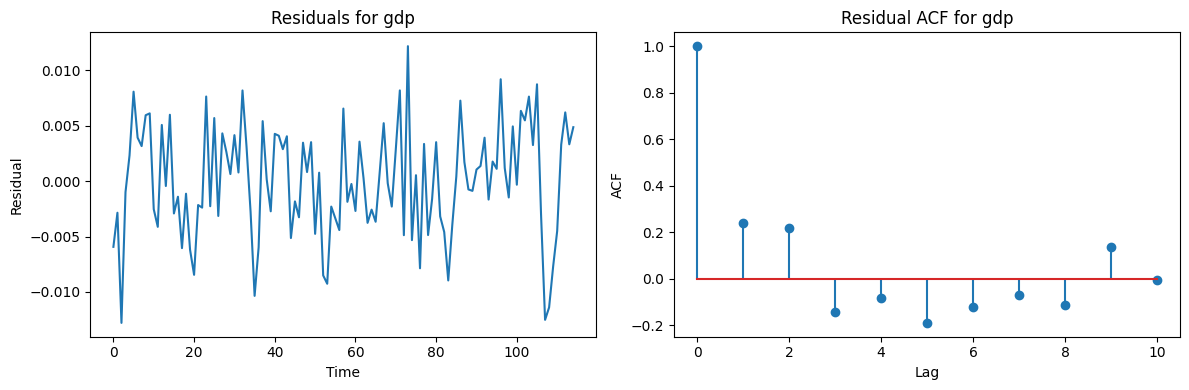

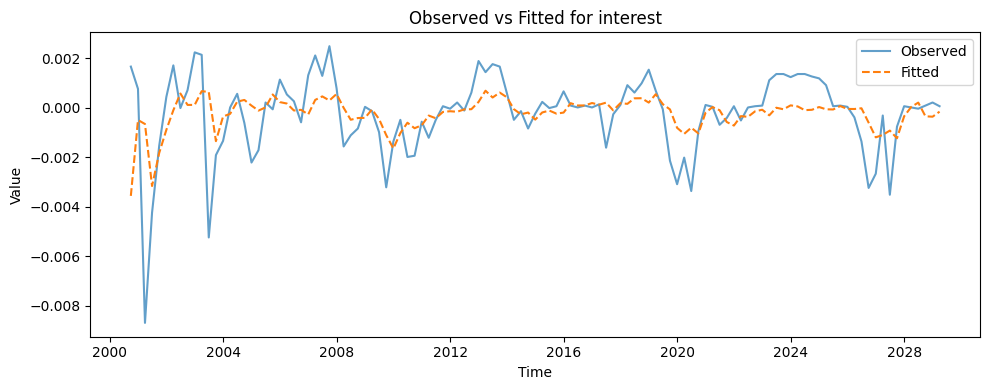

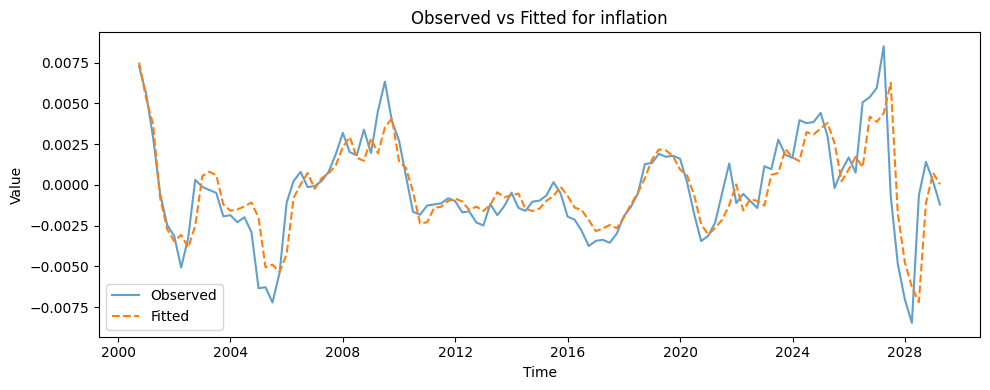

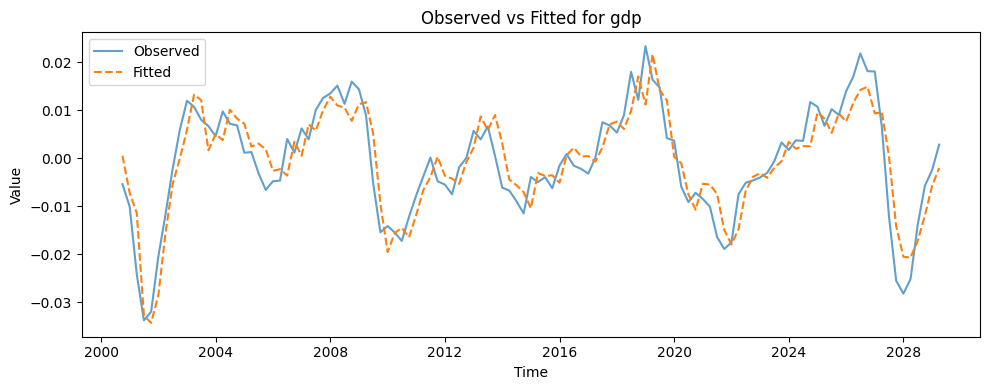


Best VAR Model:
Lags: 1
AIC: -4187.0746
interest differencing order: 0
inflation differencing order: 0
gdp differencing order: 0

Coefficient Table:
                 interest_coef  interest_se  interest_z  interest_p  \
Lag_1_interest          0.2653       0.0790      3.3574      0.0008   
Lag_1_inflation        -0.0947       0.0488     -1.9420      0.0521   
Lag_1_gdp               0.0178       0.0133      1.3350      0.1819   
Constant               -0.0001       0.0001     -1.0465      0.2953   

                 inflation_coef  inflation_se  inflation_z  inflation_p  \
Lag_1_interest           0.2107        0.0878       2.3987       0.0165   
Lag_1_inflation          0.7204        0.0542      13.2888       0.0000   
Lag_1_gdp                0.0407        0.0148       2.7482       0.0060   
Constant                -0.0001        0.0002      -0.4274       0.6691   

                 gdp_coef  gdp_se    gdp_z   gdp_p  
Lag_1_interest     1.1120  0.2722   4.0848  0.0000  
Lag_1_inflat

In [4]:
var_model = VAR(max_p=4, criterion='AIC', forecast_horizon=8, plot=True)
var_model.fit(df, date_column='date', columns=['interest', 'inflation', 'gdp'])

## 6️⃣ Forecasting

Generate multi-step-ahead forecasts for all three variables.

In [5]:
forecasts = var_model.predict()
print(forecasts.round(4))

            interest  inflation     gdp  interest_ci_lower  interest_ci_upper  \
2029-06-30    0.0000    -0.0008  0.0034            -0.0028             0.0029   
2029-09-30    0.0000    -0.0005  0.0036            -0.0041             0.0041   
2029-12-31   -0.0000    -0.0003  0.0035            -0.0050             0.0049   
2030-03-31   -0.0001    -0.0001  0.0033            -0.0058             0.0057   
2030-06-30   -0.0001    -0.0000  0.0030            -0.0065             0.0063   
2030-09-30   -0.0001     0.0000  0.0027            -0.0071             0.0069   
2030-12-31   -0.0001     0.0000  0.0023            -0.0077             0.0075   
2031-03-31   -0.0001     0.0000  0.0019            -0.0083             0.0080   

            inflation_ci_lower  inflation_ci_upper  gdp_ci_lower  gdp_ci_upper  
2029-06-30             -0.0040              0.0024       -0.0065        0.0133  
2029-09-30             -0.0050              0.0040       -0.0104        0.0176  
2029-12-31             -0.0

## 7️⃣ Residual Diagnostics & Visualization

The VAR class automatically performs residual diagnostics and generates plots for fitted vs. observed values, residuals, and autocorrelation.

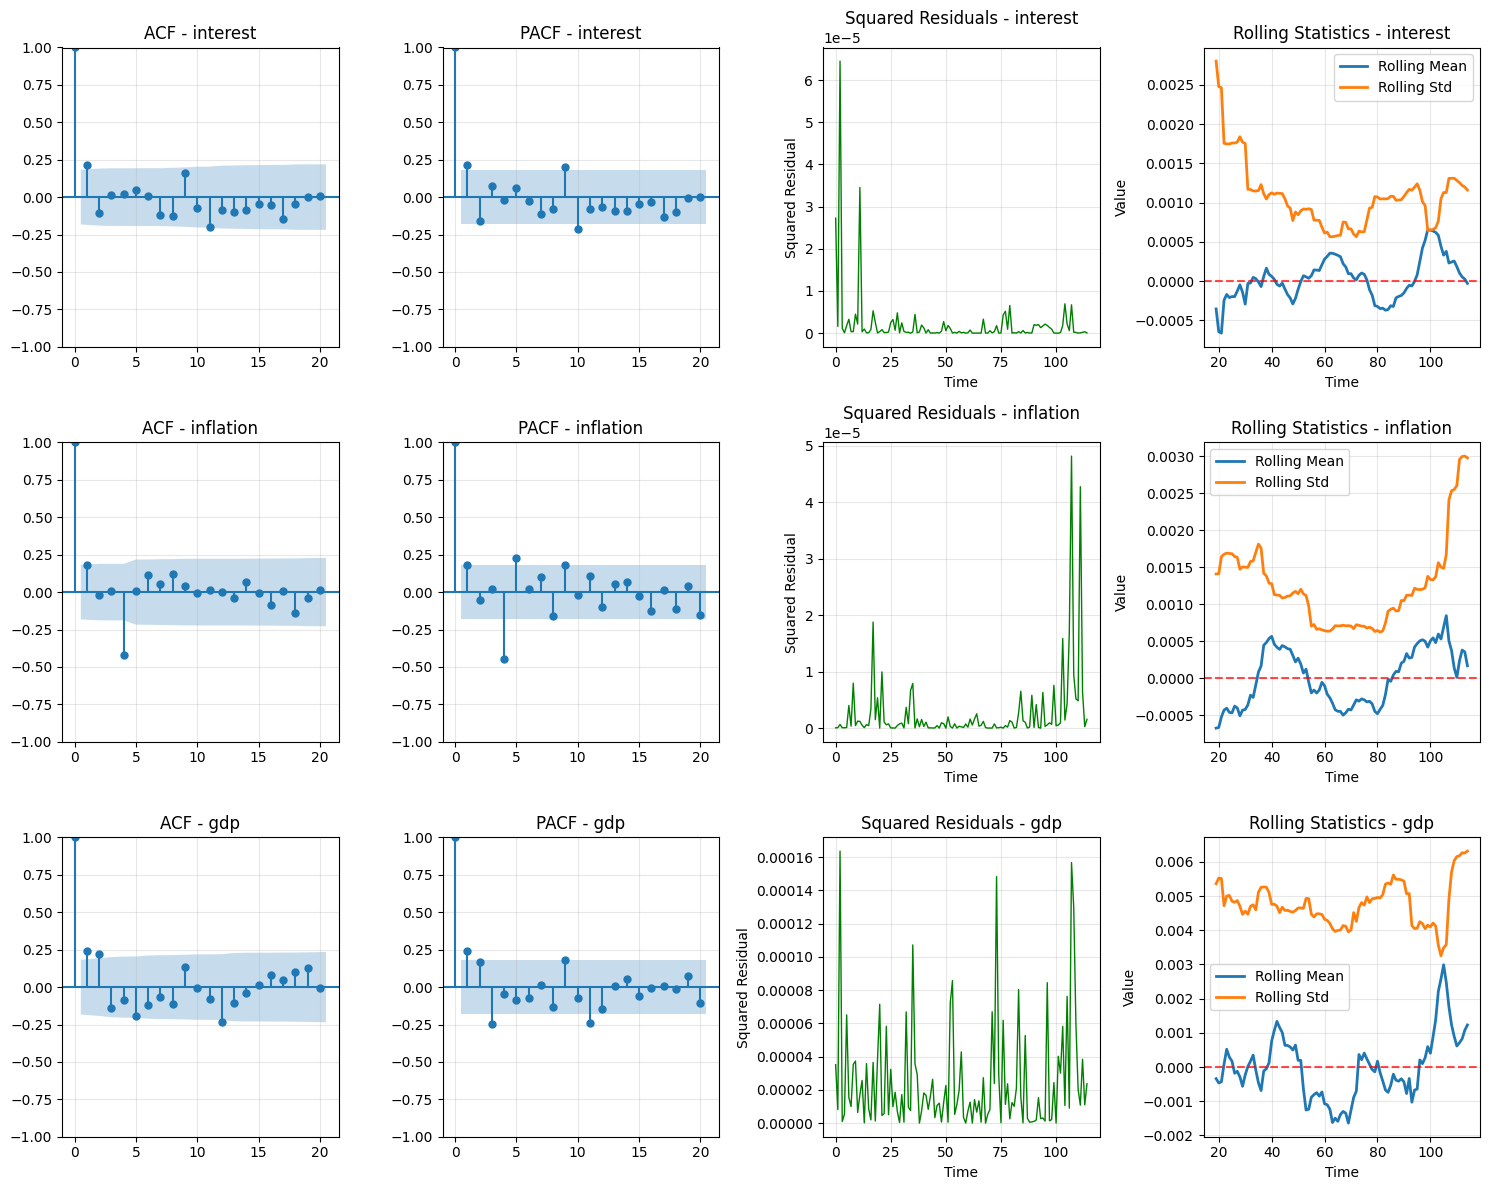


DIAGNOSTIC TEST RESULTS

INTEREST:
----------------------------------------
Mean: 0.000000
Variance: 0.000002
Ljung-Box Test: Stat=14.9262, p-value=0.1348 [PASS]
Shapiro-Wilk Test: Stat=0.8320, p-value=0.0000 [FAIL]
Jarque-Bera Test: Stat=489.6655, p-value=0.0000 [FAIL]

INFLATION:
----------------------------------------
Mean: 0.000000
Variance: 0.000003
Ljung-Box Test: Stat=29.6574, p-value=0.0010 [FAIL]
Shapiro-Wilk Test: Stat=0.9185, p-value=0.0000 [FAIL]
Jarque-Bera Test: Stat=90.1784, p-value=0.0000 [FAIL]

GDP:
----------------------------------------
Mean: 0.000000
Variance: 0.000025
Ljung-Box Test: Stat=26.3780, p-value=0.0033 [FAIL]
Shapiro-Wilk Test: Stat=0.9889, p-value=0.4749 [PASS]
Jarque-Bera Test: Stat=1.3316, p-value=0.5139 [PASS]

TEST INTERPRETATION:
PASS = Residuals satisfy the assumption (good)
FAIL = Residuals violate the assumption (potential issue)
Ljung-Box: Tests for autocorrelation (want p > 0.05)
Shapiro-Wilk: Tests for normality (want p > 0.05)
Jarque-Bera

In [6]:
# If you want to access residuals or plot again:
var_model.plot_diagnostics()

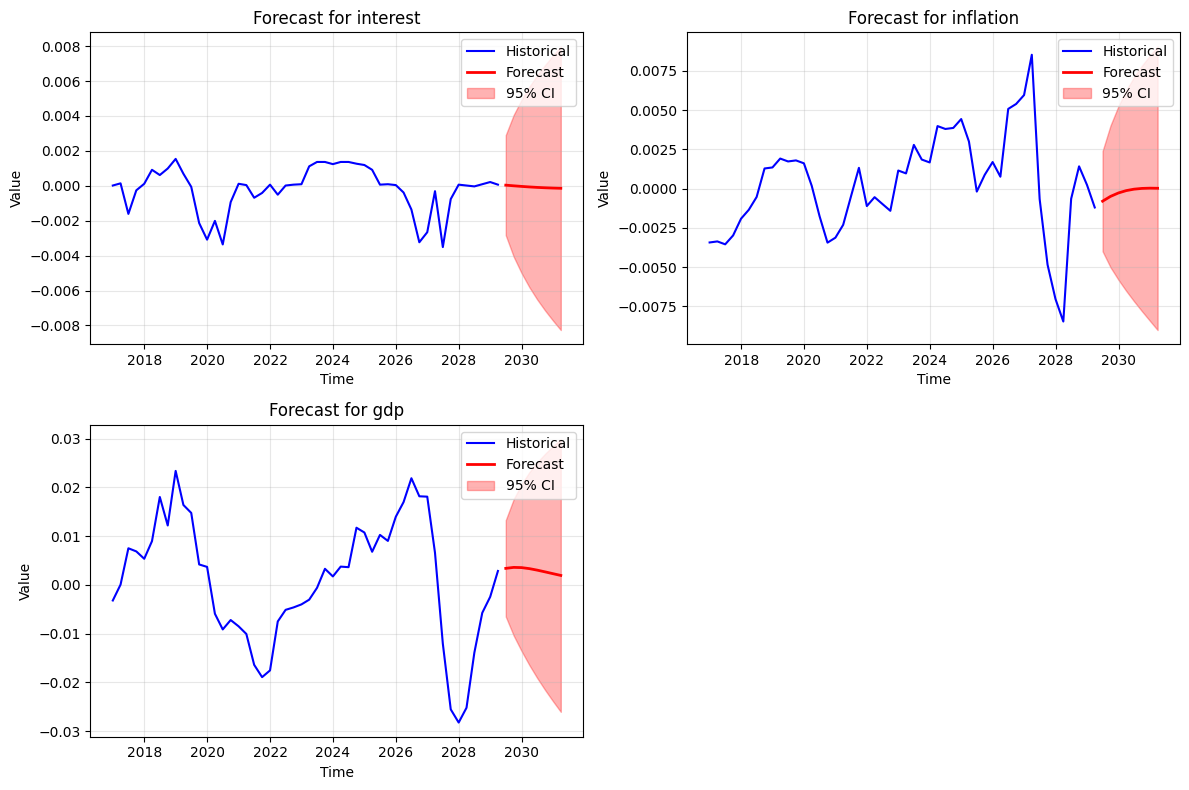

In [7]:
var_model.plot_forecasts()


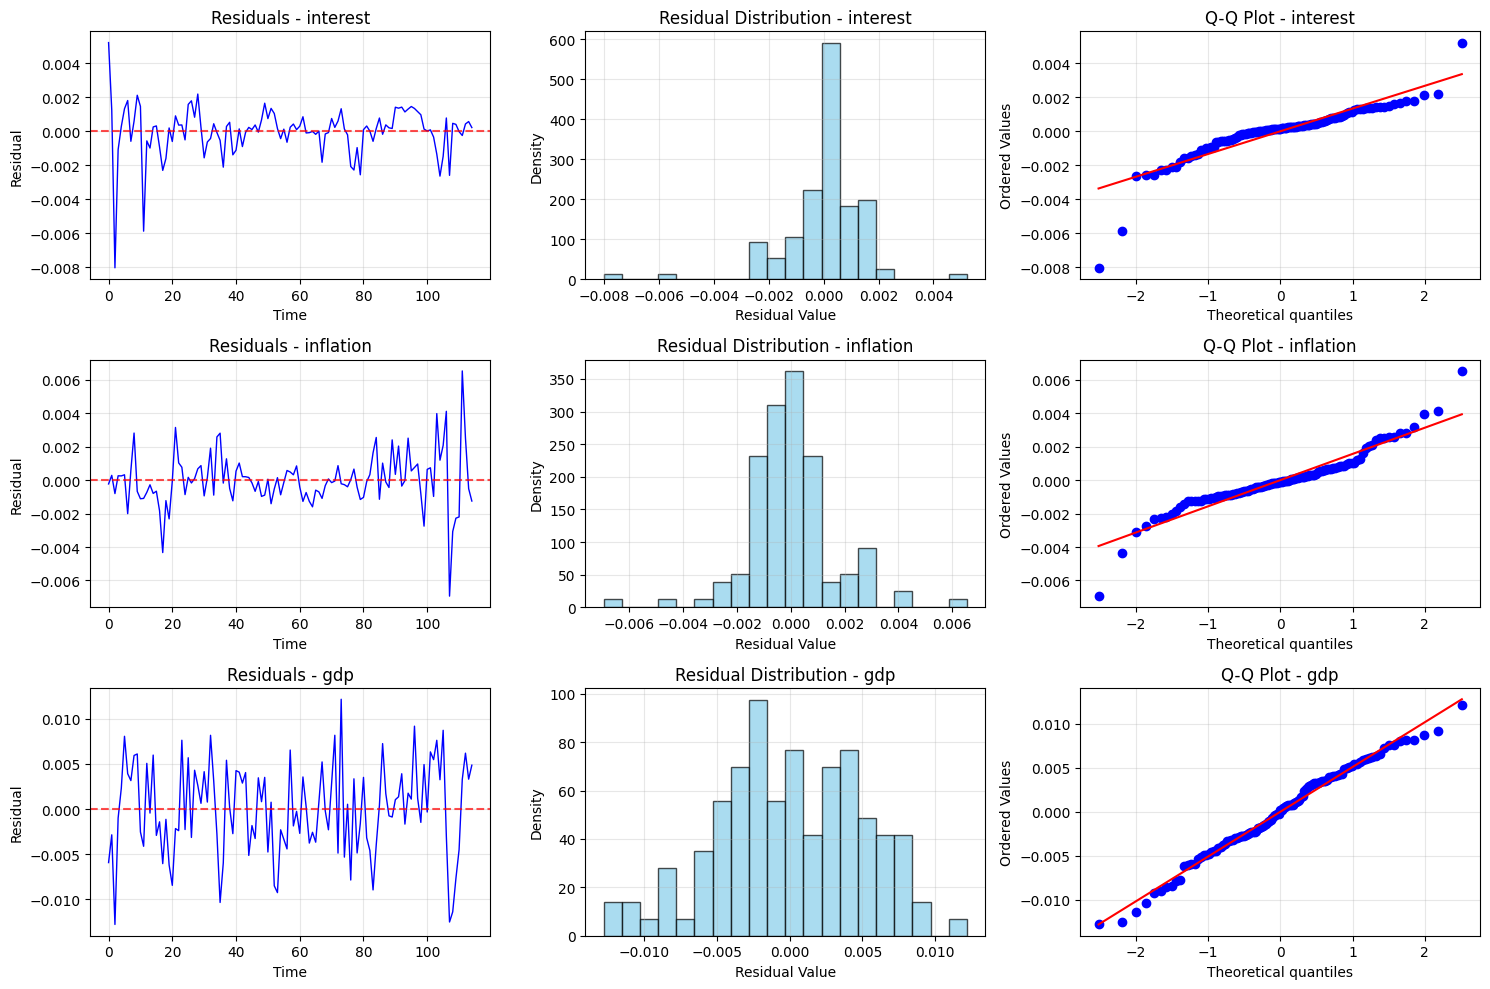

In [8]:
var_model.plot_residuals()

## 8️⃣ Conclusion

- VAR models are powerful for analyzing and forecasting interdependent macroeconomic time series.
- Econometron's VAR implementation automates lag selection, diagnostics, and visualization.
- This workflow can be adapted to other multivariate economic datasets.

---

For more, see the [Econometron Documentation](https://github.com/your-repo-link).